In [15]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Chargement des données
df = pd.read_excel('Base_ISM_PARIS_301224.xlsx')

In [10]:
# Afficher les premières lignes pour vérifie
df.head()

,hh1,hh2,a0,pond,strate,milieu,b05_region,f1,f0,g1,...,ep,v02new,education,diplome,age,deplog,depalim,bien,depenseM,P0
0,1,1,1,649.757758,ville d'Abidjan,Urbain,district autonome d'abidjan,non,NaN,non,...,Emploi permanent,Abidjan,aucun,0,38,414000.0,1.280935e+06,0.0,2268735.00,Non pauvre
1,1,2,1,860.465088,ville d'Abidjan,Urbain,district autonome d'abidjan,non,NaN,non,...,NaN,Abidjan,superieur,deug/dues/duel,24,354500.0,8.162167e+05,0.0,1655716.75,Non pauvre
2,1,3,1,789.849333,ville d'Abidjan,Urbain,district autonome d'abidjan,non,NaN,non,...,Emploi permanent,Abidjan,aucun,0,28,399500.0,7.818000e+05,0.0,1719700.00,Non pauvre
3,1,4,1,712.474380,ville d'Abidjan,Urbain,district autonome d'abidjan,non,NaN,non,...,Emploi permanent,Abidjan,superieur,deug/dues/duel,40,482000.0,7.367000e+05,0.0,2227500.00,Non pauvre
4,1,5,1,789.849333,ville d'Abidjan,Urbain,district autonome d'abidjan,non,NaN,non,...,Emploi permanent,Abidjan,secondaire,bepc,27,419000.0,3.600000e+05,NaN,1027400.00,Non pauvre


# Exploration de données

In [11]:
# Information générale
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12899 entries, 0 to 12898
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hh1         12899 non-null  int64  
 1   hh2         12899 non-null  int64  
 2   a0          12899 non-null  int64  
 3   pond        12899 non-null  float64
 4   strate      12899 non-null  object 
 5   milieu      12899 non-null  object 
 6   b05_region  12899 non-null  object 
 7   f1          12899 non-null  object 
 8   f0          2659 non-null   float64
 9   g1          12899 non-null  object 
 10  h1          12899 non-null  object 
 11  hhsize      12899 non-null  int64  
 12  a1          12899 non-null  object 
 13  gage        12899 non-null  object 
 14  a5          12899 non-null  object 
 15  a6_ethpays  12899 non-null  object 
 16  a7          12899 non-null  object 
 17  a8a         12899 non-null  object 
 18  a9a         12899 non-null  object 
 19  a10a        12899 non-nul

In [12]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print(missing_values)

hh1               0
hh2               0
a0                0
pond              0
strate            0
milieu            0
b05_region        0
f1                0
f0            10240
g1                0
h1                0
hhsize            0
a1                0
gage              0
a5                0
a6_ethpays        0
a7                0
a8a               0
a9a               0
a10a              0
a11a              0
a12a              0
cq1a              0
cq2a              0
cq4               0
cq18a             0
cq19a             0
cq20a             0
cq21a             0
cq22a             0
cq23a             0
cq24a             0
cq25          12794
dq1               0
dq3               0
dq4               0
ja1               0
ja4               0
ja6               0
popemp            8
secteur        2852
sectinst       2852
ep             3897
v02new            0
education       102
diplome           0
age               0
deplog            0
depalim          47
bien            624


In [14]:
# Traitement de la variable 'f0'
df['f0'] = df['f0'].fillna(0)

# Traitement de la variable 'bien'
df['bien'] = df['bien'].fillna(df['bien'].median())

print(df[['f0', 'bien']].isnull().sum())


f0      0
bien    0
dtype: int64


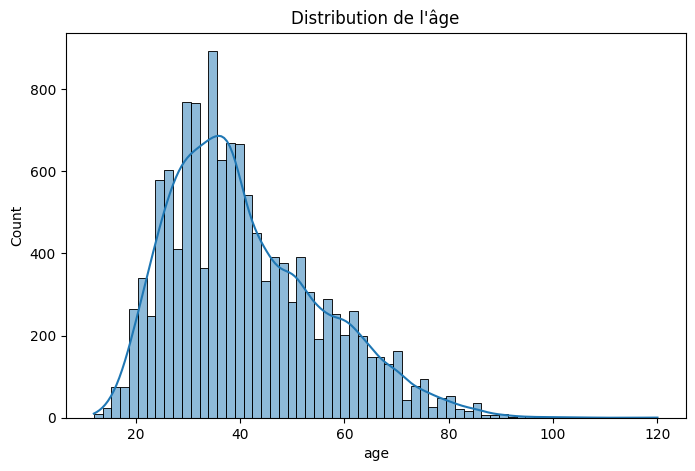

In [16]:
# Visualisation
# Distribution de l'âge
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True)
plt.title("Distribution de l'âge")
plt.show()

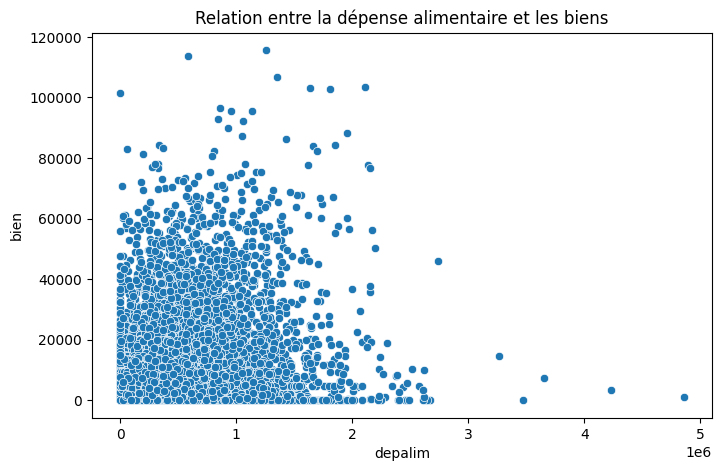

In [17]:
# Relation entre deux variables( depalim vs bien)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='depalim', y='bien', data=df)
plt.title("Relation entre la dépense alimentaire et les biens")
plt.show()

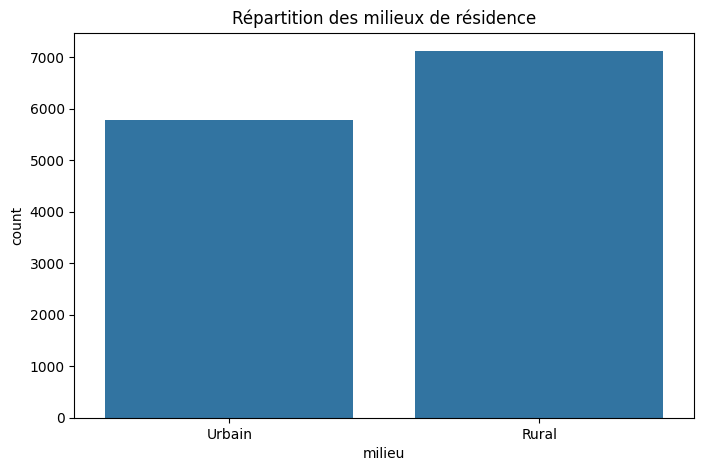

In [19]:
# Répartition des milieux de résidence
plt.figure(figsize=(8, 5))
sns.countplot(x='milieu', data=df)
plt.title("Répartition des milieux de résidence")
plt.show()

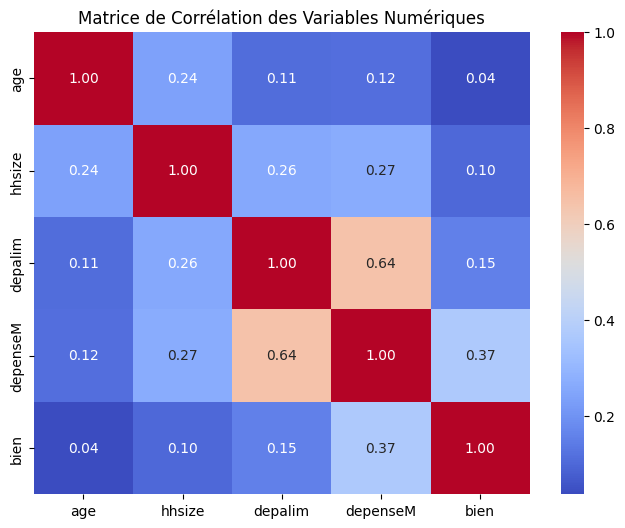

In [20]:
# Matrice de corrélation pour les variables numériques
numeric_vars = ['age', 'hhsize', 'depalim', 'depenseM', 'bien']
corr_matrix = df[numeric_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()


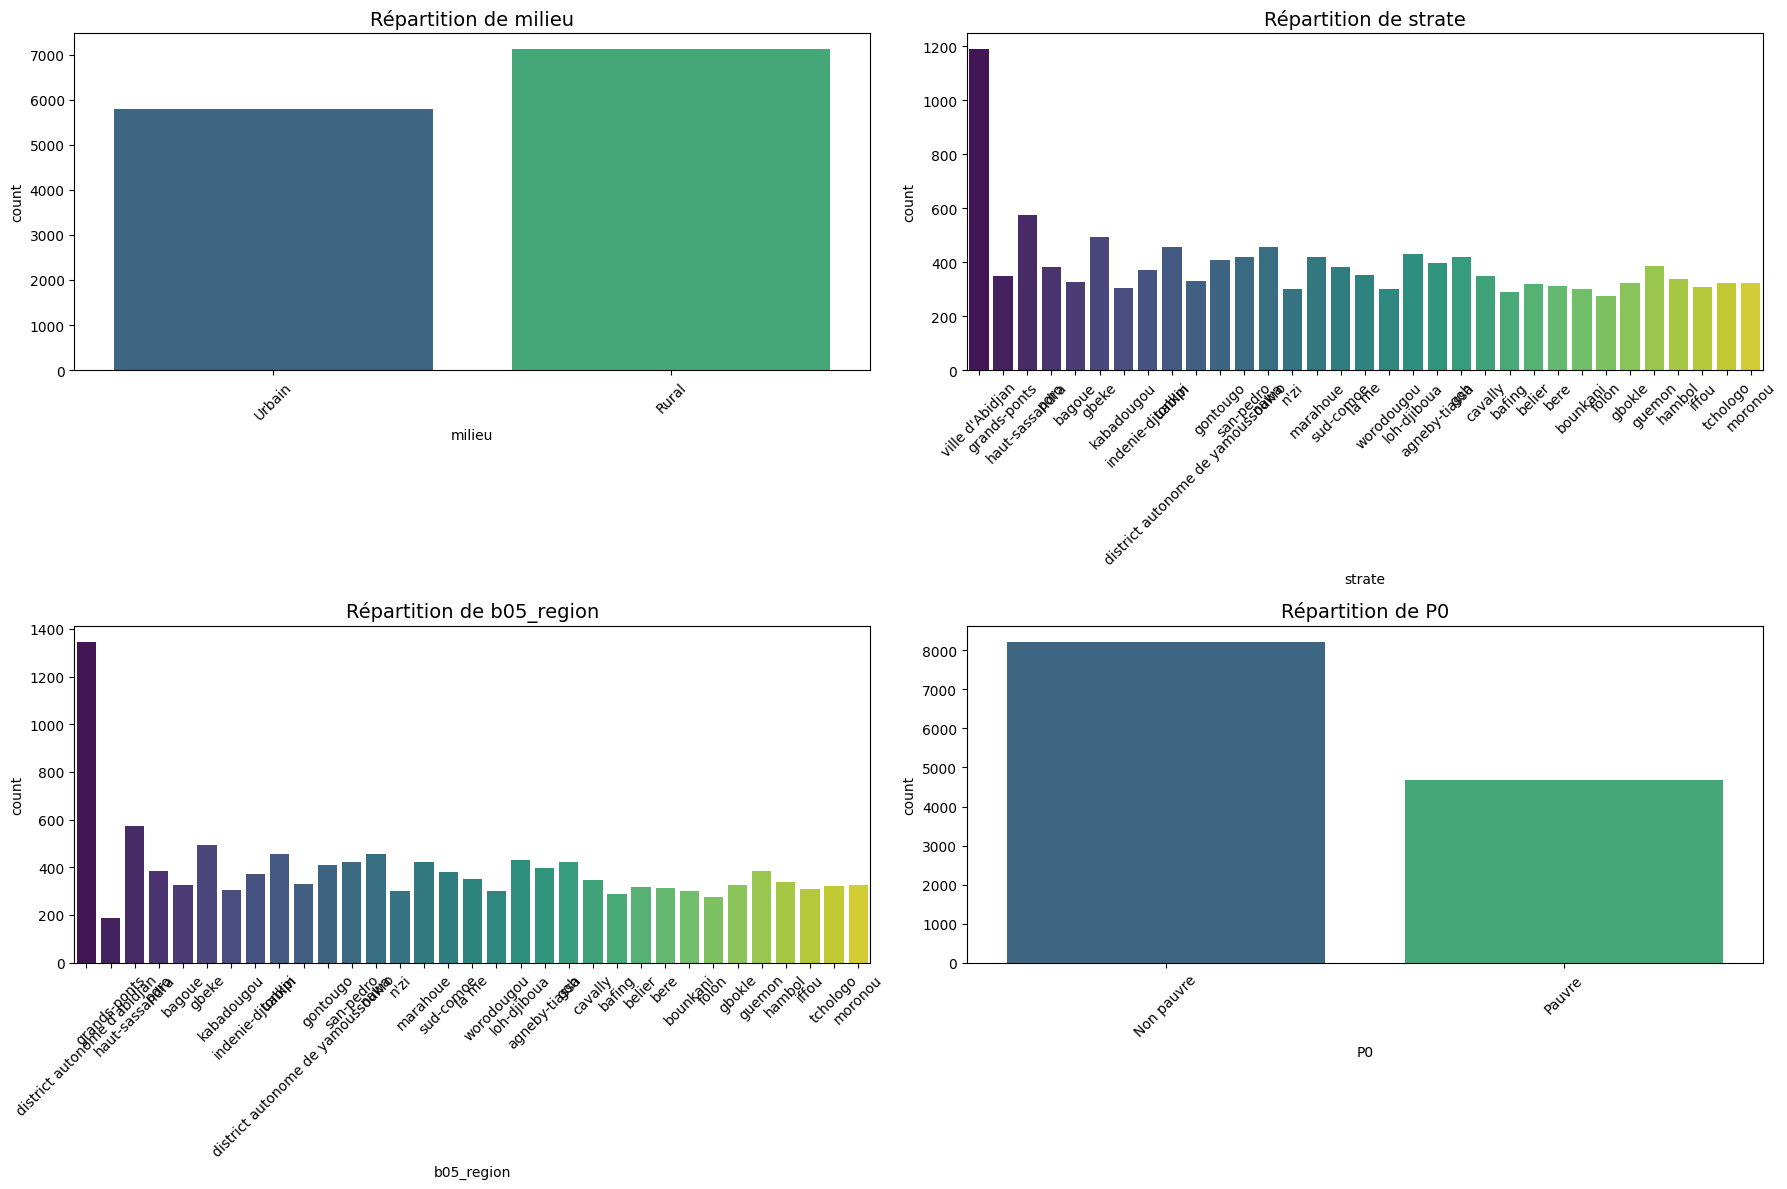

In [26]:
categorical_vars = ['milieu', 'strate', 'b05_region', 'P0']
plt.figure(figsize=(18, 12))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    
    sns.countplot(data=df, x=var, hue=var, palette="viridis", legend=False)
    plt.title(f"Répartition de {var}", fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

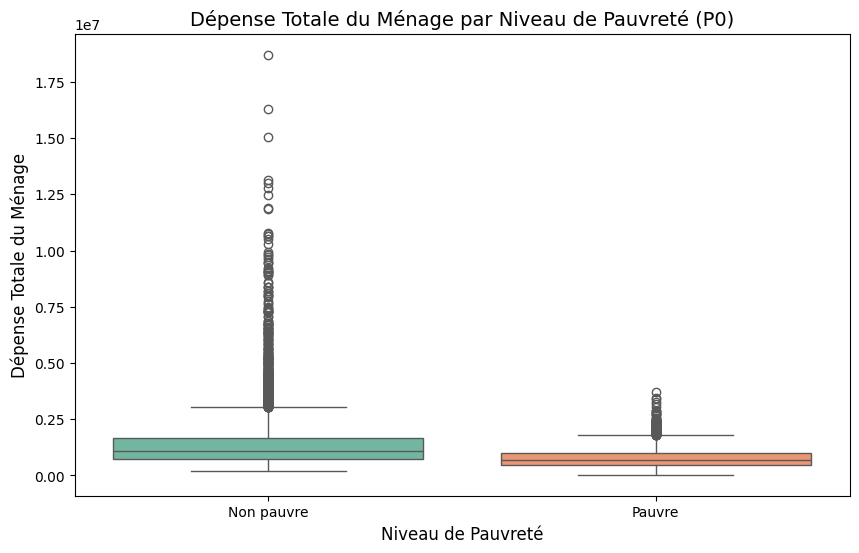

In [28]:
# Visualisation des relations entre variables catégorielles et numériques
plt.figure(figsize=(10, 6))

sns.boxplot(x='P0', y='depenseM', data=df, hue='P0', palette="Set2", dodge=False, legend=False)

plt.title("Dépense Totale du Ménage par Niveau de Pauvreté (P0)", fontsize=14)
plt.xlabel("Niveau de Pauvreté", fontsize=12)
plt.ylabel("Dépense Totale du Ménage", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

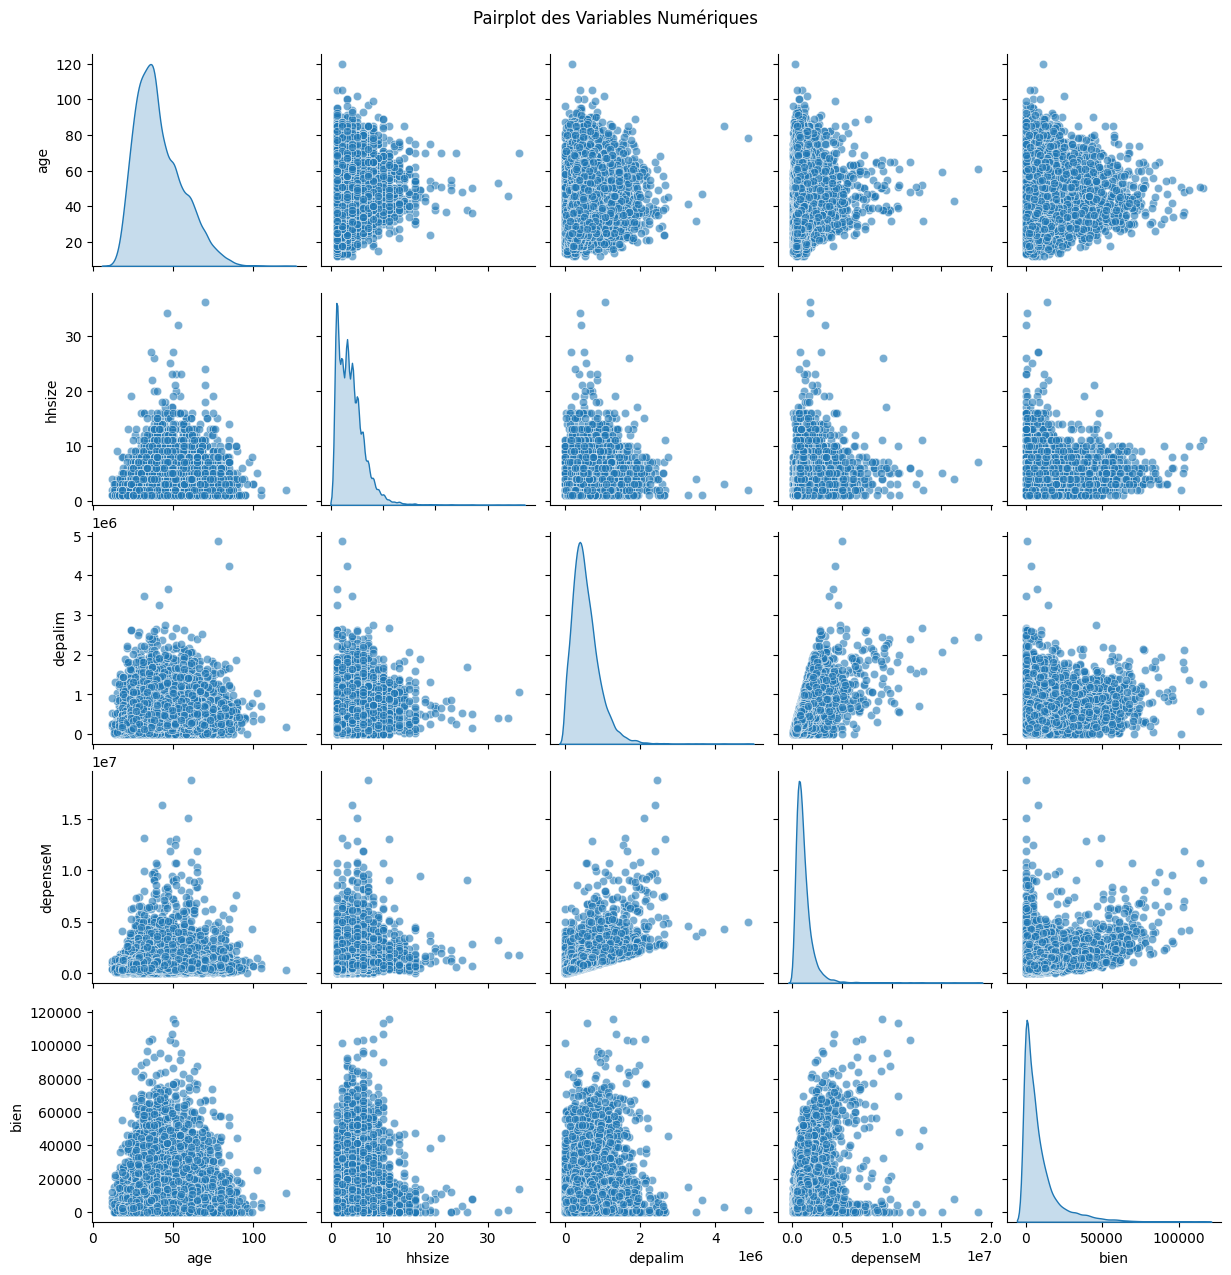

In [29]:
# Analyse bivariée avec plusieurs variables
sns.pairplot(df[numeric_vars], diag_kind="kde", plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot des Variables Numériques", y=1.02)
plt.show()
